<a href="https://colab.research.google.com/github/obarnstedt/LINdoscope2023/blob/main/intro_to_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Installing packages not included in Colab
!pip install --upgrade bokeh==2.4.3  # Bokeh 3 is currently incompatible with pandas-bokeh
!pip install pandas-bokeh
!pip install pingouin
!pip install dabest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=00d7b32f85d23c540d8f93edf6e63926fa7283ec151ce6381ae73a6be5fe22f8
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 1.1 MB/s eta 0:00:00


# Data handling

In [2]:
import numpy as np  # comprehensive package for numeric array calculations
import pandas as pd  # numpy-based dataframe calculations

In [3]:
array = np.random.rand(20, 4)
array

array([[0.34879292, 0.19198547, 0.50808341, 0.88256525],
       [0.19203283, 0.29358179, 0.03910252, 0.57552256],
       [0.4466993 , 0.57983941, 0.96358823, 0.33546132],
       [0.10767639, 0.3752124 , 0.53715737, 0.93088125],
       [0.97151077, 0.02475865, 0.57428423, 0.63169893],
       [0.05929669, 0.32079271, 0.84612407, 0.76552636],
       [0.3926566 , 0.2970835 , 0.72229242, 0.01922358],
       [0.41230616, 0.54785284, 0.51009147, 0.29583776],
       [0.83137085, 0.04021581, 0.09063195, 0.40381709],
       [0.34943968, 0.95002006, 0.6055658 , 0.71255711],
       [0.77668699, 0.39863579, 0.9403434 , 0.39178884],
       [0.96526774, 0.18828506, 0.10597593, 0.44701796],
       [0.81136059, 0.40301735, 0.37369483, 0.76055657],
       [0.0971547 , 0.11165817, 0.32298243, 0.06147731],
       [0.25074632, 0.8968663 , 0.65542942, 0.17331792],
       [0.58240564, 0.27347908, 0.44024097, 0.03659296],
       [0.51796772, 0.94769616, 0.63228177, 0.09375775],
       [0.92068075, 0.70662284,

In [4]:
df = pd.DataFrame(data=array, index=range(20), columns=['col1', 'col2', 'col3', 'col4'])
df

,col1,col2,col3,col4
0,0.348793,0.191985,0.508083,0.882565
1,0.192033,0.293582,0.039103,0.575523
2,0.446699,0.579839,0.963588,0.335461
3,0.107676,0.375212,0.537157,0.930881
4,0.971511,0.024759,0.574284,0.631699
5,0.059297,0.320793,0.846124,0.765526
6,0.392657,0.297084,0.722292,0.019224
7,0.412306,0.547853,0.510091,0.295838
8,0.831371,0.040216,0.090632,0.403817
9,0.349440,0.950020,0.605566,0.712557


In [5]:
df.rolling(window=3).mean()[::3] # 3x downsampling

,col1,col2,col3,col4
0,NaN,NaN,NaN,NaN
3,0.248803,0.416211,0.513283,0.613955
6,0.474488,0.214212,0.714234,0.472150
9,0.531039,0.512696,0.402096,0.470737
12,0.851105,0.329979,0.473338,0.533121
15,0.310102,0.427335,0.472884,0.090463
18,0.784374,0.637657,0.723332,0.398447


## Indexing

In [6]:
df.loc[(df.col1>0.5)&(df.col2<0.5)]  # select all rows where 'col1' is greater 0.5, 'col2' is smaller 0.5

,col1,col2,col3,col4
4,0.971511,0.024759,0.574284,0.631699
8,0.831371,0.040216,0.090632,0.403817
10,0.776687,0.398636,0.940343,0.391789
11,0.965268,0.188285,0.105976,0.447018
12,0.811361,0.403017,0.373695,0.760557
15,0.582406,0.273479,0.440241,0.036593
18,0.914475,0.258653,0.632504,0.924310


## Handling missing values

In [7]:
df.loc[(df.col1>0.5)&(df.col2<0.5)] = np.nan  # set these rows to NAN
df

,col1,col2,col3,col4
0,0.348793,0.191985,0.508083,0.882565
1,0.192033,0.293582,0.039103,0.575523
2,0.446699,0.579839,0.963588,0.335461
3,0.107676,0.375212,0.537157,0.930881
4,NaN,NaN,NaN,NaN
5,0.059297,0.320793,0.846124,0.765526
6,0.392657,0.297084,0.722292,0.019224
7,0.412306,0.547853,0.510091,0.295838
8,NaN,NaN,NaN,NaN
9,0.349440,0.950020,0.605566,0.712557


In [8]:
df.dropna()  # drop all rows with missing values (not saved!)

,col1,col2,col3,col4
0,0.348793,0.191985,0.508083,0.882565
1,0.192033,0.293582,0.039103,0.575523
2,0.446699,0.579839,0.963588,0.335461
3,0.107676,0.375212,0.537157,0.930881
5,0.059297,0.320793,0.846124,0.765526
6,0.392657,0.297084,0.722292,0.019224
7,0.412306,0.547853,0.510091,0.295838
9,0.349440,0.950020,0.605566,0.712557
13,0.097155,0.111658,0.322982,0.061477
14,0.250746,0.896866,0.655429,0.173318


In [9]:
df.interpolate(method='linear')  # interpolate missing values with 'linear' method

,col1,col2,col3,col4
0,0.348793,0.191985,0.508083,0.882565
1,0.192033,0.293582,0.039103,0.575523
2,0.446699,0.579839,0.963588,0.335461
3,0.107676,0.375212,0.537157,0.930881
4,0.083487,0.348003,0.691641,0.848204
5,0.059297,0.320793,0.846124,0.765526
6,0.392657,0.297084,0.722292,0.019224
7,0.412306,0.547853,0.510091,0.295838
8,0.380873,0.748936,0.557829,0.504197
9,0.349440,0.950020,0.605566,0.712557


# Visualisation

## Static plotting

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

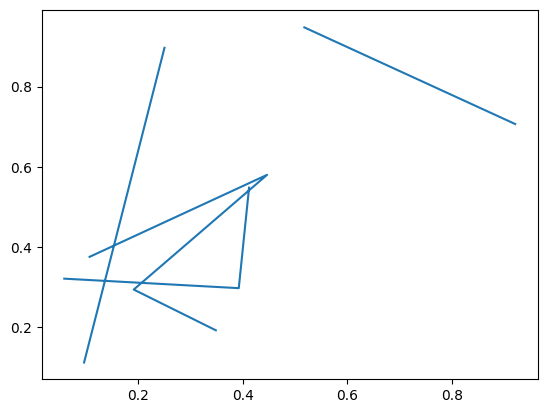

In [11]:
plt.plot(df.col1, df.col2)  # plot line of 'col2' against 'col1' in Euclidean space

<Axes: xlabel='col1', ylabel='col2'>

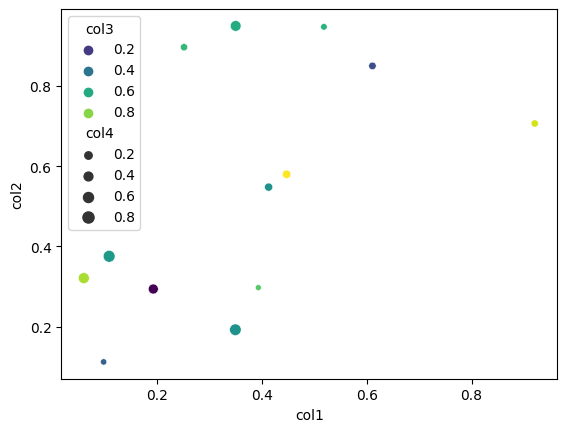

In [23]:
sns.scatterplot(data=df, x='col1', y='col2', hue='col3', size='col4', palette='viridis')

<Axes: >

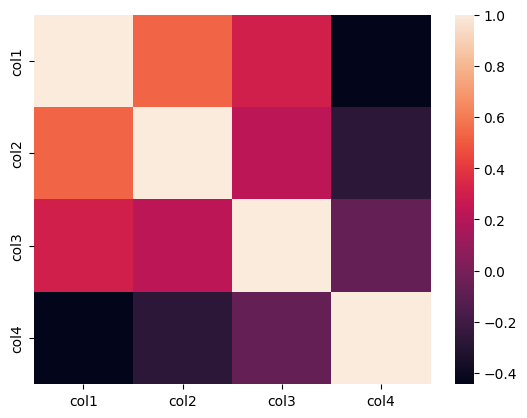

In [13]:
sns.heatmap(df.corr(), label=True)  # make a heatmap of cross-correlations

## Interactive plotting

In [14]:
pd.options.plotting.backend = "plotly"  # set pandas plotting backend to the interactive visualisation platform 'plotly'
df.plot()

In [19]:
df.plot(kind='box')

In [20]:
df.plot(kind='scatter')

In [24]:
import pandas_bokeh
pandas_bokeh.output_notebook()
df.plot_bokeh()

Figure(id='1565', ...)

# Statistics

In [26]:
df  # let's have another look at our data frame

,col1,col2,col3,col4
0,0.348793,0.191985,0.508083,0.882565
1,0.192033,0.293582,0.039103,0.575523
2,0.446699,0.579839,0.963588,0.335461
3,0.107676,0.375212,0.537157,0.930881
4,NaN,NaN,NaN,NaN
5,0.059297,0.320793,0.846124,0.765526
6,0.392657,0.297084,0.722292,0.019224
7,0.412306,0.547853,0.510091,0.295838
8,NaN,NaN,NaN,NaN
9,0.349440,0.950020,0.605566,0.712557


In [27]:
df.describe()  # pandas gives us basic statistics, ignoring NA values

,col1,col2,col3,col4
count,13.000000,13.000000,13.000000,13.000000
mean,0.362009,0.543806,0.577324,0.401991
std,0.237518,0.300930,0.262617,0.327256
min,0.059297,0.111658,0.039103,0.019224
25%,0.192033,0.297084,0.508083,0.173318
50%,0.349440,0.547853,0.605566,0.295838
75%,0.446699,0.850267,0.722292,0.712557
max,0.920681,0.950020,0.963588,0.930881


In [28]:
import pingouin as pg
pg.ttest(df.col1, df.col2)

ModuleNotFoundError: ignored